# Todos

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse



# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()


# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


# Create a directory and mount Google Drive using that directory.
!mkdir -p drive
!google-drive-ocamlfuse drive

print('Files in Drive:')
!ls drive/

# Create a file in Drive.
!echo "This newly created file will appear in your Drive file list." > drive/created.txt

E: Package 'python-software-properties' has no installation candidate


Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 110842 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=

* y改為報酬率區間
* 注意原資料的時間順序

In [0]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [0]:
import datetime

### Step 0. Loading dataset and data cleaning
* txf: 台指期
* if1: 滬深300
* s2sfc: 上證A50
* hsic: 香港恆生指數期貨

In [4]:
!dir data

dir: cannot access 'data': No such file or directory


In [0]:
# stock = pd.read_csv('data/SHSE.600519_2015-2018_day_end.txt', header=None)

In [6]:
!dir drive/MyPython

Cat  PUBG  PythonDataScienceHandbook-master  Trade\ AI


In [0]:
stock = pd.read_csv('drive/MyPython/Trade AI/data/SHSE.600519_20181217_end.txt', header=None)

In [0]:
stock.columns = ['symbol', 'date', 'time', 'open', 'high', 'low', 'close', 'volume']

In [0]:
stock_drop = stock.drop(['date', 'time', 'symbol'], axis=1)

In [0]:
stock['datetime'] = pd.to_datetime(stock['date']+' '+stock['time'], format='%Y-%m-%d %H:%M:%S')


In [0]:
stock_drop = stock.drop(['date', 'time', 'symbol'], axis=1)

In [12]:
stock_drop.head(5)

,open,high,low,close,volume,datetime
0,198.779999,198.800003,197.050003,198.619995,277070.0,2015-10-08 09:31:00
1,198.639999,199.190002,198.639999,199.190002,143324.0,2015-10-08 09:32:00
2,199.199997,200.479996,199.199997,200.479996,103269.0,2015-10-08 09:33:00
3,200.500000,201.100006,200.500000,201.100006,120355.0,2015-10-08 09:34:00
4,201.119995,201.580002,200.600006,201.000000,116100.0,2015-10-08 09:35:00


In [0]:
# Set Date-Time as index
stock_drop.set_index('datetime', inplace=True)

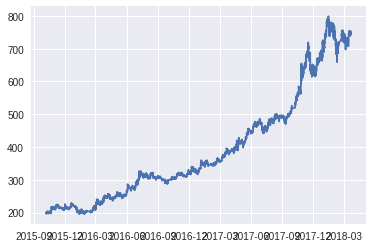

In [14]:
plt.plot(stock_drop['close'])

In [15]:
stock_drop.shape

(143239, 5)

In [0]:
stock_drop = stock_drop.dropna()

In [17]:
stock_drop.shape

(143239, 5)

In [18]:
stock_drop.head(10)

,open,high,low,close,volume
datetime,,,,,
2015-10-08 09:31:00,198.779999,198.800003,197.050003,198.619995,277070.0
2015-10-08 09:32:00,198.639999,199.190002,198.639999,199.190002,143324.0
2015-10-08 09:33:00,199.199997,200.479996,199.199997,200.479996,103269.0
2015-10-08 09:34:00,200.500000,201.100006,200.500000,201.100006,120355.0
2015-10-08 09:35:00,201.119995,201.580002,200.600006,201.000000,116100.0
2015-10-08 09:36:00,201.000000,201.000000,200.000000,200.000000,66640.0
2015-10-08 09:37:00,200.000000,200.000000,199.800003,199.800003,34626.0
2015-10-08 09:38:00,199.619995,199.820007,199.619995,199.660004,51980.0
2015-10-08 09:39:00,199.660004,199.850006,199.630005,199.820007,38981.0


### Step 1. Data preprocessing

#### Step 1.1 Scaling data

In [0]:
from sklearn import preprocessing

In [0]:
df=stock_drop.values

In [0]:
def window_data(data, window_size):
    X = []
    y = []
    
    i = 0
    while (i + window_size) <= len(data) - 1:
        now_close = data[i+window_size-1,3] # close price
        next_close = data[i+window_size,3] # close price
#         print(now_close)
        X.append(data[i:i+window_size])
        future_return = (next_close-now_close)/now_close
        if not now_close:
            print('zero divident: ', i)
#         print(future_return)
        
# 分兩類
#         if future_return>=0.:
#             y.append([0,1])
#         else:
#             y.append([1,0])


# 分三類
        BARRIER = 0.00001
        if future_return>=BARRIER:
            y.append([0,0,1])
        elif (future_return<BARRIER) & (future_return>-BARRIER):
            y.append([0,1,0])
        else:
            y.append([1,0,0])      
        
# 分五類
#         if future_return>0.0003:
#             y.append([0,0,0,0,1])
#         elif (future_return>0.0001) & (future_return<=0.0003):
#             y.append([0,0,0,1,0])
#         elif (future_return>=-0.0001) & (future_return<=0.0001):
#             y.append([0,0,1,0,0])
#         elif (future_return>=-0.0003) & (future_return<-0.0001):
#             y.append([0,1,0,0,0])
#         else:
#             y.append([1,0,0,0,0])
        
# 分九類
#         if future_return>0.0003:
#             y.append([0,0,0,0,0,0,0,0,1])
#         elif (future_return>0.00015) & (future_return<=0.0003):
#             y.append([0,0,0,0,0,0,0,1,0])
#         elif (future_return>0.00005) & (future_return<=0.00015):
#             y.append([0,0,0,0,0,0,1,0,0])
#         elif (future_return>0) & (future_return<=0.00005):
#             y.append([0,0,0,0,0,1,0,0,0])
#         elif future_return==0:
#             y.append([0,0,0,0,1,0,0,0,0])
#         elif (future_return>-0.00005) & (future_return<0):
#             y.append([0,0,0,1,0,0,0,0,0])
#         elif (future_return>-0.00015) & (future_return<=-0.00005):
#             y.append([0,0,1,0,0,0,0,0,0])
#         elif (future_return>-0.0003) & (future_return<=-0.00015):
#             y.append([0,1,0,0,0,0,0,0,0])
#         else:
#             y.append([1,0,0,0,0,0,0,0,0])
        
        i += 1
    assert len(X) ==  len(y)
    return X, y

#### Step 1.2 Windowing the dataset

In [0]:
window_size = 15

In [0]:
X, y = window_data(df, window_size)

In [24]:
len(X), len(y)

(143224, 143224)

#### Step 1.3 Creating Training and Testing sets

In [0]:
num_train = 96000

In [26]:
X_train  = np.array(X[:num_train])
y_train = np.array(y[:num_train])

X_test = np.array(X[num_train:])
y_test = np.array(y[num_train:])

print("X_train size: {}".format(X_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(X_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (96000, 15, 5)
y_train size: (96000, 3)
X_test size: (47224, 15, 5)
y_test size: (47224, 3)


### Let's create the RNN

In [0]:
epochs = 10
batch_size = 256
num_classes = 3
feature_size = 5

In [0]:
def get_a_cell(lstm_size, keep_prob):
    lstm = tf.nn.rnn_cell.BasicLSTMCell(lstm_size)
    drop = tf.nn.rnn_cell.DropoutWrapper(lstm, output_keep_prob=keep_prob)
    return drop

def multi_LSTM_cell(hidden_layer_size, batch_size, number_of_layers, dropout, dropout_rate):
    cell = tf.nn.rnn_cell.MultiRNNCell(
              [get_a_cell(hidden_layer_size, dropout_rate) for _ in range(number_of_layers)])
    init_state = cell.zero_state(batch_size, tf.float32)
    return cell, init_state

In [0]:
def output_layer(lstm_output, in_size, out_size):
    
    x = lstm_output[:, -1, :]
    print(x)
    weights = tf.Variable(tf.truncated_normal([in_size, out_size], stddev=0.05), name='output_layer_weights')
    bias = tf.Variable(tf.zeros([out_size]), name='output_layer_bias')
    
    output = tf.matmul(x, weights) + bias
    return output

In [0]:
def opt_loss(logits, targets, learning_rate, grad_clip_margin):
    # original loss define
    losses = []
    for i in range(targets.get_shape()[0]):
#         print([(tf.pow(logits[i] - targets[i], 2))])
        losses.append([(tf.pow(logits[i] - targets[i], 2))])
        
    loss = tf.reduce_sum(losses)/(2*batch_size)
    
    # cross entropy define
#     loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=targets))
    #Cliping the gradient loss
    gradients = tf.gradients(loss, tf.trainable_variables())
    clipper_, _ = tf.clip_by_global_norm(gradients, grad_clip_margin)
    optimizer = tf.train.AdamOptimizer(learning_rate)
    train_optimizer = optimizer.apply_gradients(zip(clipper_, tf.trainable_variables()))
    return loss, train_optimizer

In [0]:
# a = np.array([5,0,0])
# b = np.array([1,0,0])
# c = tf.pow(a - b, 2)
# with tf.Session() as sess:
#     print(sess.run(c))
# d = tf.reduce_sum(c)

In [0]:
class StockPredictionRNN(object):
    
    def __init__(self, learning_rate=0.01, batch_size=batch_size, hidden_layer_size=64, number_of_layers=6, 
                 dropout=True, dropout_rate=0.2, number_of_classes=num_classes, gradient_clip_margin=4, window_size=window_size):
    
        self.inputs = tf.placeholder(tf.float32, [batch_size, window_size, feature_size], name='input_data')
        self.targets = tf.placeholder(tf.float32, [batch_size, num_classes], name='targets')

        cell, init_state = multi_LSTM_cell(hidden_layer_size, batch_size, number_of_layers, dropout, dropout_rate)

        outputs, states = tf.nn.dynamic_rnn(cell, self.inputs, initial_state=init_state)

        self.logits = output_layer(outputs, hidden_layer_size, number_of_classes)
        self.prob = tf.nn.softmax(self.logits)

        self.loss, self.opt = opt_loss(self.logits, self.targets, learning_rate, gradient_clip_margin)

In [33]:
tf.reset_default_graph()
model = StockPredictionRNN()

Instructions for updating:
This class is deprecated, please use tf.nn.rnn_cell.LSTMCell, which supports all the feature this cell currently has. Please replace the existing code with tf.nn.rnn_cell.LSTMCell(name='basic_lstm_cell').
Tensor("strided_slice:0", shape=(256, 64), dtype=float32)


In [34]:
tf.global_variables()

[<tf.Variable 'rnn/multi_rnn_cell/cell_0/basic_lstm_cell/kernel:0' shape=(69, 256) dtype=float32_ref>,
 <tf.Variable 'rnn/multi_rnn_cell/cell_0/basic_lstm_cell/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'rnn/multi_rnn_cell/cell_1/basic_lstm_cell/kernel:0' shape=(128, 256) dtype=float32_ref>,
 <tf.Variable 'rnn/multi_rnn_cell/cell_1/basic_lstm_cell/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'rnn/multi_rnn_cell/cell_2/basic_lstm_cell/kernel:0' shape=(128, 256) dtype=float32_ref>,
 <tf.Variable 'rnn/multi_rnn_cell/cell_2/basic_lstm_cell/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'rnn/multi_rnn_cell/cell_3/basic_lstm_cell/kernel:0' shape=(128, 256) dtype=float32_ref>,
 <tf.Variable 'rnn/multi_rnn_cell/cell_3/basic_lstm_cell/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'rnn/multi_rnn_cell/cell_4/basic_lstm_cell/kernel:0' shape=(128, 256) dtype=float32_ref>,
 <tf.Variable 'rnn/multi_rnn_cell/cell_4/basic_lstm_cell/bias:0' shape=(256,) dtype=float

### Time to train the network

In [0]:
session =  tf.Session()

In [0]:
session.run(tf.global_variables_initializer())

In [37]:
total_epoch_loss = []
for i in range(epochs):
    traind_scores = []
    traind_prob = []
    ii = 0
    epoch_loss = []
    while(ii + batch_size) <= len(X_train):
        X_batch = X_train[ii:ii+batch_size]
        y_batch = y_train[ii:ii+batch_size]
        
        p, o, c, _ = session.run([model.prob, model.logits, model.loss, model.opt], feed_dict={model.inputs:X_batch, model.targets:y_batch})
        
        epoch_loss.append(c)
        traind_scores.append(o)
        traind_prob.append(p)
        ii += batch_size
    total_epoch_loss.append(c)
    print('Epoch {}/{}'.format(i, epochs), ' Current loss: {}'.format(np.mean(epoch_loss)))

Epoch 0/10  Current loss: 0.2986578345298767
Epoch 1/10  Current loss: 0.2927340567111969
Epoch 2/10  Current loss: 0.2926296293735504
Epoch 3/10  Current loss: 0.2926207184791565
Epoch 4/10  Current loss: 0.2925646901130676
Epoch 5/10  Current loss: 0.2925912141799927
Epoch 6/10  Current loss: 0.29259753227233887
Epoch 7/10  Current loss: 0.2926095128059387
Epoch 8/10  Current loss: 0.29256659746170044
Epoch 9/10  Current loss: 0.2926098704338074


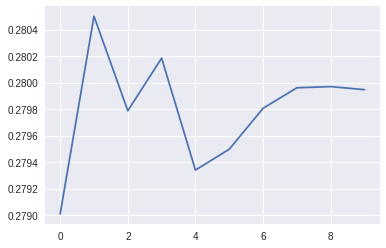

In [38]:
import matplotlib.pyplot as plt
# epoch_loss
plt.plot(total_epoch_loss)

### save model

In [0]:
model_save_path = 'drive/MyPython/Trade AI/ckpt/rnn'
SAVED = 0

In [0]:
if SAVED:
    saver = tf.train.Saver()
    saver.save(sess=session, save_path=model_save_path)

In [0]:
sup =[]
for i in range(len(traind_prob)):
    for j in range(len(traind_prob[i])):
        sup.append(traind_prob[i][j])

In [0]:
tests = []
i = 0
while i+batch_size <= len(X_test):
    
    o = session.run([model.prob], feed_dict={model.inputs:X_test[i:i+batch_size]})
    i += batch_size
    tests.append(o)

In [0]:
tests_new = []
for i in range(len(tests)):
    for j in range(len(tests[i][0])):
        tests_new.append(tests[i][0][j])

In [0]:
test_results = []
for i in range(749):
    if i >= 701:
        test_results.append(tests_new[i-701])
    else:
        test_results.append(None)

In [45]:
len(sup)

96000

In [46]:
sup[30]

array([0.37270898, 0.25244898, 0.37484208], dtype=float32)

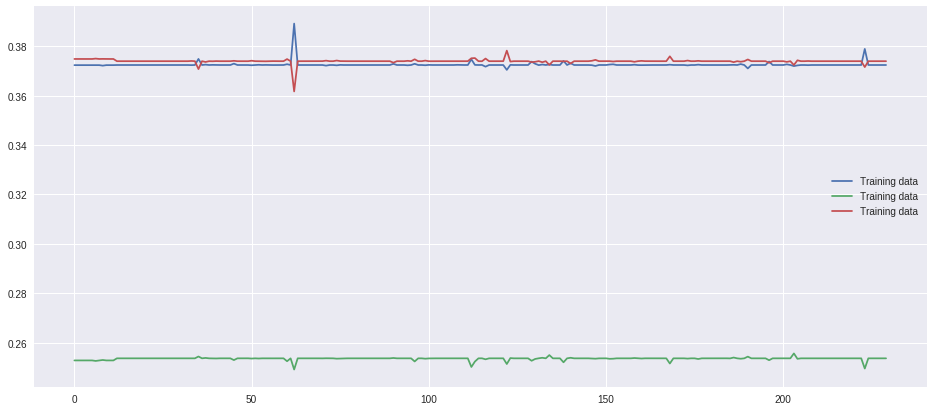

In [47]:
plt.figure(figsize=(16, 7))
# plt.plot(scaled_dataset, label='Original data')
plt.plot(sup[500:730], label='Training data')
# plt.plot(test_results[:], label='Testing data')
plt.legend()
plt.show()